# Construction de graphiques avec Matplotlib

In [ ]:
Sources : 
Python pour la Data Science - Jake VanderPlas
https://www.youtube.com/watch?v=82KLS2C_gNQ (Machine Learning)

## Eléments pour construire un graphique

In [2]:
import matplotlib.pyplot as plt

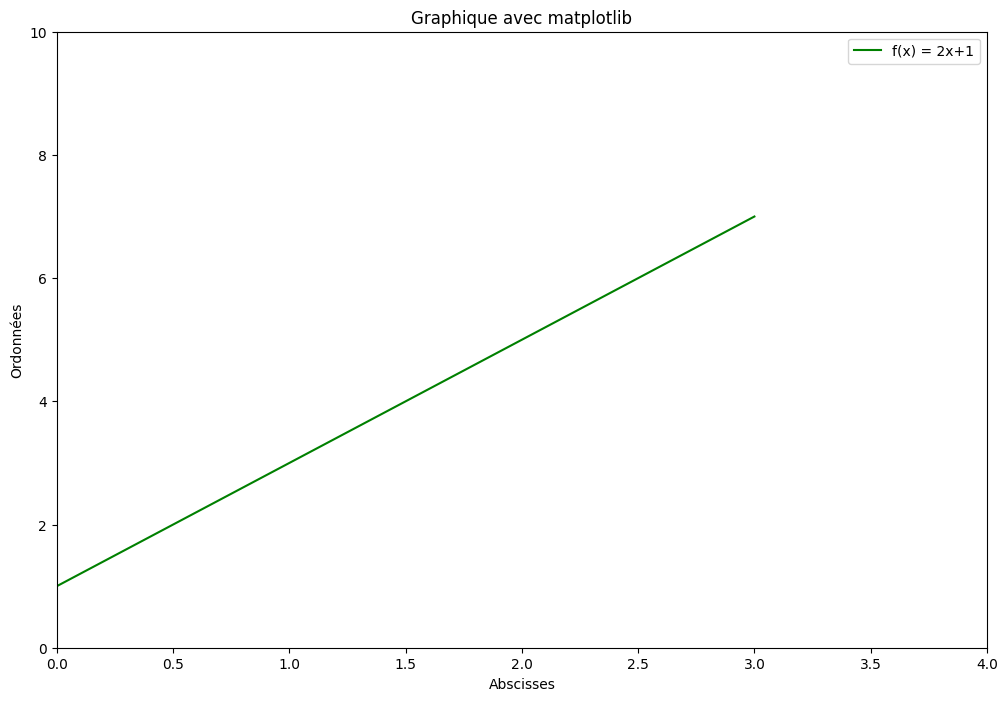

In [4]:
plt.figure(figsize=(12,8)) # taille de la figure en inches
plt.axis((0,4,0,10))
plt.title("Graphique avec matplotlib")
plt.xlabel("Abscisses")
plt.ylabel("Ordonnées")

x = [0,1,2,3]              # ta
y = [1,3,5,7]

plt.plot(x,y,label = "f(x) = 2x+1",c='green')
plt.legend()

plt.show()
plt.close()


## Superposition de graphiques avec subplot()

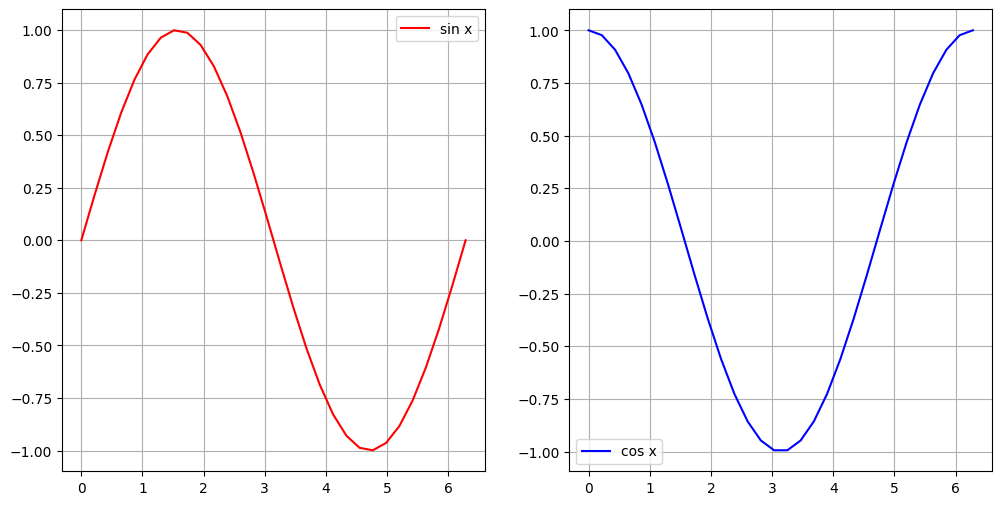

In [15]:
import numpy as np

plt.figure(figsize = (12,6))

x = np.linspace(0, 2*np.pi,30)  # 30 intervalles entre 0 et 2pi

plt.subplot(1,2,1)              # (1,2,1) : 1 ligne, 2 colonnes, position 1
plt.grid()
plt.plot(x,np.sin(x), c = "red", label = "sin x")
plt.legend()

plt.subplot(1,2,2)              # (1,2,2) : 1 ligne, 2 colonnes, position 2  
plt.grid()
plt.plot(x,np.cos(x), c = "blue", label = "cos x")
plt.legend()

plt.show()

## Construction d'un cercle

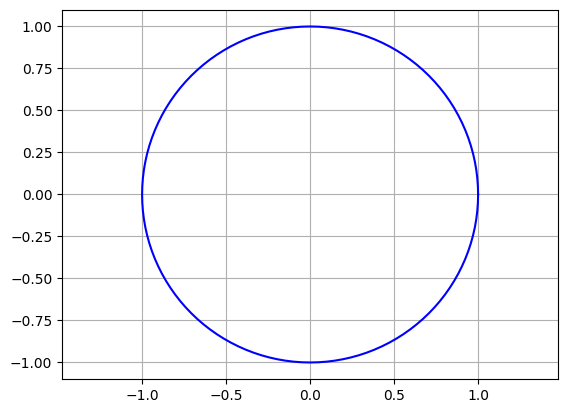

In [21]:
n = 128
R = 1

plt.figure()
plt.axis("equal")
plt.grid()

# subdivision de l'intervalle (0, 2*pi) en n portions
t = np.linspace(0, 2*np.pi, n+1) # génère n+1 valeurs linéairement espacées entre 0 et 2pi

# coordonnées des points du cercle
x = R * np.cos(t)
y = R * np.sin(t)

# dessin des points
plt.plot(x,y, color="blue")

plt.show()

## Matplotlib orienté objet

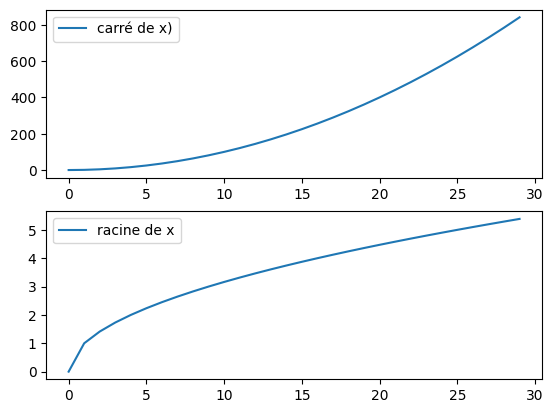

In [51]:
fig, ax = plt.subplots(2,1)  # figure est un objet, ax est un nparray d'objets

x = np.arange(0,30,1)
y = np.square(x)
z = np.sqrt(x)

ax[0].plot(x,y,label="carré de x)")
ax[0].legend()

ax[1].plot(x,z,label="racine de x")
ax[1].legend()


plt.show()

## Bac à sable

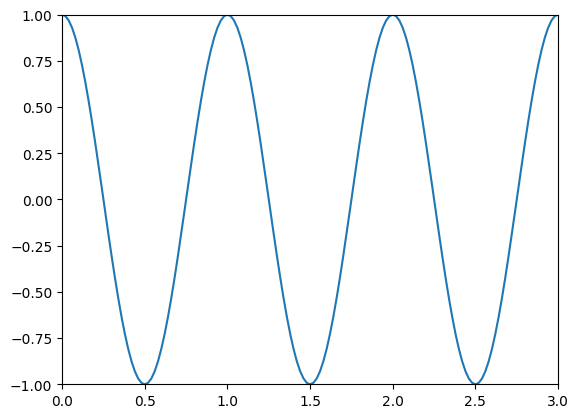

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

k = 2*np.pi
w = 2*np.pi
dt = 0.01

xmin = 0
xmax = 3
nbx = 151

x = np.linspace(xmin, xmax, nbx)

fig = plt.figure() # initialise la figure
line, = plt.plot([], []) 
plt.xlim(xmin, xmax)
plt.ylim(-1, 1)

def animate(i): 
    t = i * dt
    y = np.cos(k*x - w*t)
    line.set_data(x, y)
    return line,
 
ani = animation.FuncAnimation(fig, animate, frames=100,
                              interval=1, blit=True, repeat=False)
plt.show()


## Bac à sable

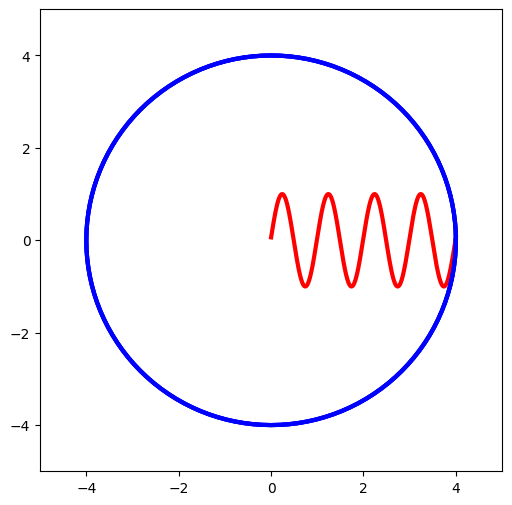

In [4]:
'''
@date : octobre 2024
@author : YF
'''

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# constantes
LIMITE_AXES = 5
R = 4

# initialisation de la figure et des axes
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([-LIMITE_AXES,LIMITE_AXES])
ax.set_ylim([-LIMITE_AXES,LIMITE_AXES])

# initialisation de la variable ligne
line, = ax.plot([], [], color="red", lw = 3)

def draw_circle(rayon):   # R: rayon du cercle
    
    n = 128
    # subdivision de l'intervalle (0, 2*pi) en n portions
    t = np.linspace(0, 2*np.pi, n+1) # génère n+1 valeurs linéairement espacées entre 0 et 2pi

    # coordonnées des points du cercle
    x = rayon * np.cos(t)
    y = rayon * np.sin(t)

    # dessin des points
    plt.plot(x,y, color="blue", lw=3)
   
# data which the line will contain (x, y) 
def init():  
    draw_circle(R)
    line.set_data([], [])
    return line, 
   
def animate(i): 
    x = np.linspace(0, 4, 1000) 
   
    # plots
    y = np.sin(2 * np.pi * (x - 0.01 * i)) 
    line.set_data(x, y) 
      
    return line, 

# main
line_anim = FuncAnimation(fig, animate, init_func = init, 
                     frames = 200, interval = 20, blit = True) 

HTML(line_anim.to_jshtml())
#plt.show()